In [1]:
import pandas as pd
import re
import string
import numpy as np
import utils 
import nltk


C:\Users\peaks\AppData\Local\Temp\ipykernel_5444\831790845.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from keras import layers,optimizers,Sequential,regularizers

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peaks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
index = df_train.shape[0]

In [6]:
df = pd.concat([df_train,df_test])
df = df.reset_index(drop=True)
text = df['text'].tolist()
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1.0
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1.0
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1.0
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1.0
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1.0


In [7]:
def processed(text):
    a = []
    for t in text:
        a.append(' '.join(utils.process_tweet(t)))
    return a


In [8]:
df_processed = processed(text)
df['Processed'] = df_processed

In [9]:
df_processed

['deed reason earthquak may allah forgiv us',
 'forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 '13,000 peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour school',
 'rockyfir updat california hwi 20 close direct due lake counti fire cafir wildfir',
 'flood disast heavi rain caus flash flood street manit colorado spring area',
 "i'm top hill see fire wood ...",
 "there' emerg evacu happen build across street",
 "i'm afraid tornado come area ...",
 'three peopl die heat wave far',
 'haha south tampa get flood hah wait second live south tampa gonna gonna fvck flood',
 "rain flood florida tampabay tampa 18 19 day i'v lost count",
 'flood bago myanmar arriv bago',
 'damag school bu 80 multi car crash break',
 "what' man",
 'love fruit',
 'summer love',
 'car fast',
 'goooaaal',
 'ridicul ...',
 'london cool ;)',
 'love ski',
 'wonder day',
 'loool',
 "way ... can't eat shit",
 'nyc l

In [10]:

df.head(10)

,id,keyword,location,text,target,Processed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0,deed reason earthquak may allah forgiv us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,forest fire near la rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0,"13,000 peopl receiv wildfir evacu order califo..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0,got sent photo rubi alaska smoke wildfir pour ...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1.0,rockyfir updat california hwi 20 close direct ...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1.0,flood disast heavi rain caus flash flood stree...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1.0,i'm top hill see fire wood ...
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1.0,there' emerg evacu happen build across street
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1.0,i'm afraid tornado come area ...


In [11]:
y = df['target']



In [12]:
df.index

RangeIndex(start=0, stop=10876, step=1)

In [13]:
index = df_train.shape[0]
X_tng = df.loc[df.index < index]
x_tst = df.loc[df.index >= index]
X_tng = X_tng.drop(columns='id')
x_tst = x_tst.drop(columns='id')

In [14]:
x_tst

,keyword,location,text,target,Processed
7613,NaN,NaN,Just happened a terrible car crash,NaN,happen terribl car crash
7614,NaN,NaN,"Heard about #earthquake is different cities, s...",NaN,heard earthquak differ citi stay safe everyon
7615,NaN,NaN,"there is a forest fire at spot pond, geese are...",NaN,forest fire spot pond gees flee across street ...
7616,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,NaN,apocalyps light spokan wildfir
7617,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,NaN,typhoon soudelor kill 28 china taiwan
...,...,...,...,...,...
10871,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,earthquak safeti lo angel  ûò safeti fasten xrwn
10872,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN,storm ri wors last hurrican citi 3other hardes...
10873,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN,green line derail chicago
10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,meg issu hazard weather outlook hwo


In [15]:
X_t = X_tng['text'].tolist()
X_t = np.array(X_t)
x_t = x_tst['text'].tolist()
x_t = np.array(x_t)

In [16]:
y = y.dropna().tolist()
y
y = np.array(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2, random_state=69)

In [18]:
VOCAB_SIZE = 10000
encoder = layers.TextVectorization(
    max_tokens=VOCAB_SIZE,standardize='lower_and_strip_punctuation')
encoder.adapt(X_t)

In [19]:
vocab = np.array(encoder.get_vocabulary())
len(vocab)

10000

Building Model.

In [20]:

model = Sequential([
    encoder,
    layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    layers.Bidirectional(layers.LSTM(64,  return_sequences=True)),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid',kernel_regularizer=regularizers.L2(0.0005))
])


In [21]:
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 bidirectional (Bidirection  (None, None, 128)         66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                        

In [23]:
history = model.fit(X_t,y, epochs=30,validation_data=(X_test,y_test),validation_steps=30)

Epoch 1/30

238/238 [==============================] - 22s 36ms/step - loss: 0.6779 - accuracy: 0.5786 - val_loss: 0.6059 - val_accuracy: 0.7216
Epoch 2/30
238/238 [==============================] - 4s 19ms/step - loss: 0.5087 - accuracy: 0.7967 - val_loss: 0.3822 - val_accuracy: 0.8661
Epoch 3/30
238/238 [==============================] - 4s 19ms/step - loss: 0.3758 - accuracy: 0.8592 - val_loss: 0.3040 - val_accuracy: 0.8910
Epoch 4/30
238/238 [==============================] - 4s 19ms/step - loss: 0.3038 - accuracy: 0.8906 - val_loss: 0.2345 - val_accuracy: 0.9271
Epoch 5/30
238/238 [==============================] - 4s 19ms/step - loss: 0.2471 - accuracy: 0.9176 - val_loss: 0.1852 - val_accuracy: 0.9468
Epoch 6/30
238/238 [==============================] - 4s 19ms/step - loss: 0.2068 - accuracy: 0.9322 - val_loss: 0.1489 - val_accuracy: 0.9560
Epoch 7/30
238/238 [==============================] - 4s 19ms/step - loss: 0.1685 - accuracy: 0.9456 - val_loss: 0.1187 - val_accuracy: 0.96

In [24]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(1)

,loss,accuracy,val_loss,val_accuracy,epoch
29,0.041799,0.979509,0.032696,0.986868,29


In [25]:
model.evaluate(X_t,y)

238/238 [==============================] - 1s 6ms/step - loss: 0.0404 - accuracy: 0.9823


[0.04042332246899605, 0.9822672009468079]

In [26]:
import matplotlib.pyplot as plt

In [27]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.7101178217679263)

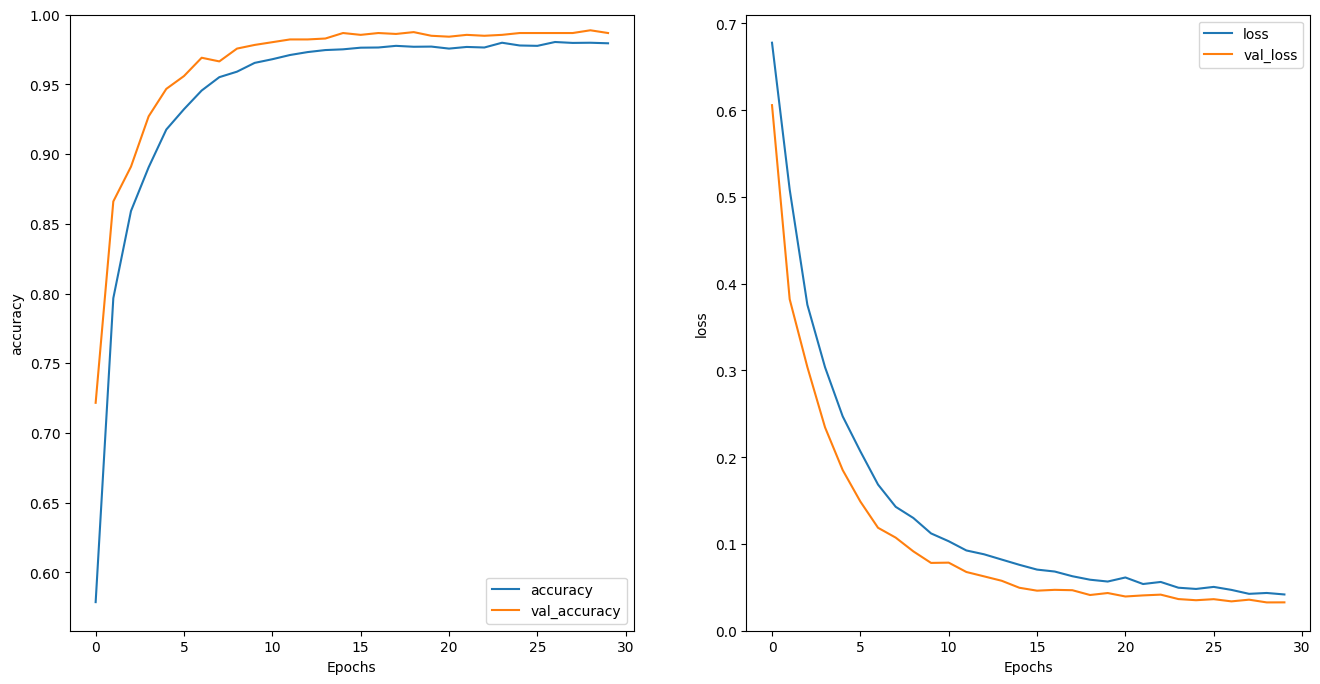

In [28]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [29]:
res = model.predict(x_t)

102/102 [==============================] - 5s 5ms/step


Convert result from sigmoid to 0 or 1.

In [30]:
res[:10]

array([[8.0361730e-01],
       [5.0170618e-01],
       [9.9999994e-01],
       [8.5197735e-01],
       [9.9999970e-01],
       [9.5452452e-01],
       [1.7460859e-08],
       [4.9978763e-02],
       [1.0905629e-02],
       [2.0970097e-01]], dtype=float32)

In [31]:
result = []
for i in res:
    if i >= 0.5:
        result.append(1)
    else:
        result.append(0)
len(result)

3263

In [32]:
df_res = df_test.drop(columns=['keyword','location','text'])
df_res['target'] = result

In [33]:
df_res.head(30)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [35]:
df_res.to_csv('submission.csv', index=False)
df_res.to_csv(r'C:\Users\peaks\Desktop\Submission\submission.csv', index=False)